# Separations Final Project  
## Clean Water For All Through Nanostructured Membranes  
##### Separations Processes, Professor Dowling  
##### Oct 2, 2017  
#####  Katherine Herila, Soren Kyhl, & Mabelle Wongsanguan  
##### University of Notre Dame Dept. of Chemical Engineering  


In [537]:
# Import Python Libraries
%matplotlib inline
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Model 1:  Batch Isothermal Adsorption
Models a single stage equilibrium batch absorption.

### Variables:
#### known:
$ V_i $, Initial Solution volume  
$ c_i $, Initial Solution Concentration  
$ \theta_i $, Initial Membrane Loading  
$ m $, Membrane mass  

#### unknown:
$ V_f $, Final Solution volume  
$ c_f $, Final Solution Concentration  
$ \theta_f $, Final Membrane Loading  

### Equations:

Component Mass Balance (heavy metal)
$$ \theta_i m + V_i c_i = V_f c_f + \theta_f m $$  

Overall Mass Balance (Assuming the solution is dilute, the total liquid volume will remain unchanged)   
$$ V_f = V_i \equiv V $$ 

Isotherm  (Adsorption Equilibrium Equation).   
$$ \theta_f \equiv f(c_f) $$

 
### DOF analysis
Three unknown variables, three equations := fully defined  


## Solution Strategy
The system simplifies to:  
$$ c_f - c_i = q (\theta_i - \theta(c_f)) $$ 

Where q is defined as the packing factor  
$$ q = \frac{m}{V} $$  
  
this is a single nonlinear function of $c_f$, final solution concentration. It may be solved with a nonlinear equation solver, fsolve.

# Isotherm Modeling:
Membrane Adsorption will be modeled by the Langmuir Isotherm
  
$$ \theta(c) = \frac{QKc}{1+Kc} $$  

according to the following parameters:  
$ K $ is the Equilibrium Constant,  
$ Q $  is the maximum amount of bound ions per mass of membrane  
  
Isotherm parameters will be approximated by least-squares regression of data from the PhD thesis of Weidman.
  
The Isotherm function is linearized by the following steps:    
$$ \theta = \frac{KQc}{1+Kc} $$   
$$ \frac{c}{\theta} = \frac{1+Kc}{KQ} $$  
$$ \frac{c}{\theta} = \frac{c}{Q} + \frac{1}{KQ} $$ 

Plotting $\frac{c}{\theta}$ vs. $c$ yields a linear trend and best fit line with slope and intercept:   
$$ m = \frac{1}{Q} $$    
$$ b = \frac{1}{KQ} $$  

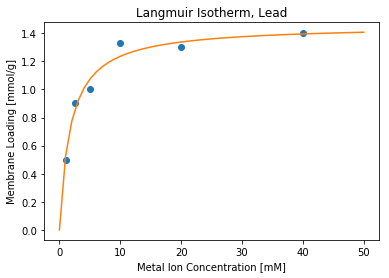

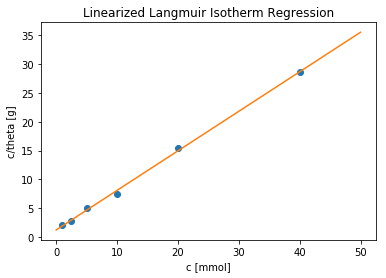

In [525]:
# Import Isotherm Data
# Source: Nanoporous Block Polymer Thin Films Functionalized with Bio-
# Inspired Ligands for the Efficient Capture of Heavy Metal Ions from Water
# Weidman, 2017. 
with open('IsothermData.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    conc = []
    load = []
    for row in readCSV:
        c = float(row[0])
        l = float(row[1])
        
        conc.append(c)
        load.append(l)
    conc = np.array(conc)
    load = np.array(load)


# Linearize
y = conc/load
x = conc

# Regression
[m,b] = np.polyfit(x,y,1)

# Calculate Parameters
Q = 1/m
K = 1/(Q*b)

# Define Isotherm Function
def theta(c):
    return Q*K*c/(1+K*c)

# Define Regression Line Function 
def regression(c):
    return m*c + b

c_vec = np.linspace(0,50,50)

# Plot Isotherm
plt.figure(1)
plt.plot(conc,load, 'o')
plt.plot(c_vec, theta(c_vec))
plt.title('Langmuir Isotherm, Lead')
plt.xlabel('Metal Ion Concentration [mM]')
plt.ylabel('Membrane Loading [mmol/g]')

# Plot Linear Regression
plt.figure(2)
plt.plot(x,y, 'o')
plt.plot(c_vec, regression(c_vec))
plt.title('Linearized Langmuir Isotherm Regression')
plt.xlabel('c [mmol]')
plt.ylabel('c/theta [g]')

# Model Simulation

In [526]:
# Define Model 
def model_1(ci, q, theta_i):
    def obj_fn(c):
        return (c - ci) + q*(theta(c) - theta_i)
    return fsolve(obj_fn,0)

### 1) Effect of Packing Factor
Simulate Model 1 across domain of initial concentrations for several packing factor values. Initial loading is set to be 0.  
Plot initial concentration vs fraction removed [x]  
$$ x = \frac{c_o - c_f}{c_o} $$  


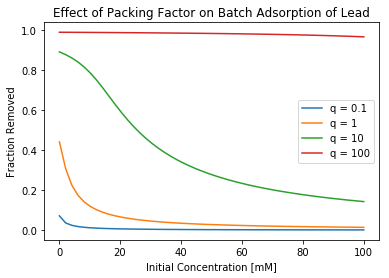

In [536]:
# initialize vectors
npts = 50
ci_vec = np.linspace(0.1,100,npts) 
q_vec = [0.1, 1, 10, 100]

# simulate model
x = np.zeros([npts,len(q_vec)])
for i,q in enumerate(q_vec):
    for j,ci in enumerate(ci_vec):
        cf = float(model_1(ci,q,0))
        x[j,i] = (ci-cf)/ci

# define legend information
legend_vec = []
for q in q_vec:
    legend_vec.append("q = " + str(q))

# plot results
plt.plot(ci_vec,x)
plt.title('Effect of Packing Factor on Batch Adsorption of Lead')
plt.xlabel('Initial Concentration [mM]')
plt.ylabel('Fraction Removed')
plt.legend(legend_vec)

Increasing the packing factor enhances the removal of heavy metals.  
This corresponds to increasing the mass of membrane relative to the volume of the solution.

### 2) Effect of Initial Loading

Simulate Model 1 across initial concentration domains for different values of Initial loading. Packing factor is set to be 10.

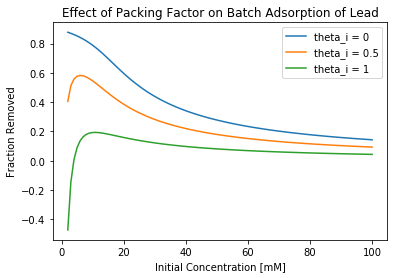

In [535]:
# initialize vectors 
npts = 100
ci_vec = np.linspace(2,100,npts)
thetai_vec = [0,0.5,1]


# simulate model
x = np.zeros([npts,len(thetai_vec)])
for i,t in enumerate(thetai_vec):
    for j,ci in enumerate(ci_vec):
        cf = float(model_1(ci,10,t))
        x[j,i] = (ci-cf)/ci

# define legend information
legend_vec = []
for t in thetai_vec:
    legend_vec.append("theta_i = " + str(t))

# plot results
plt.plot(ci_vec,x)
plt.title('Effect of Packing Factor on Batch Adsorption of Lead')
plt.xlabel('Initial Concentration [mM]')
plt.ylabel('Fraction Removed')
plt.legend(legend_vec)

Increasing initial loading decreases the removal of heavy metal ions. In the extreme case, if initial concentrations are low enough and initial loading high enough, the membrane regenerates; metal ions desorb from the membrane and enter into solution: (-)'ve Fraction Removed.